In [ ]:
Code crafted by: Yamid Felipe Quiroga González

In [25]:
#IMPORTED LIBRARIES
#requests is a library that allows us to make requests to APIS, this is essential for the project
#json is a library to modify the visual appearance of a json
#datetime is a library that contains time values, its use is mainly related to data access
#azurecosmos are libraries for connecting to the cosmos database in Azure, these allow us to access the database API to make queries
#os is a library that allows us to interact with the operating system where the program is executed
#matplotlib is a data visualization library in Python that provides a variety of tools for creating static, interactive, and animated charts 
import json, requests, os
from datetime import datetime
import azure.cosmos.documents as documents
import azure.cosmos.cosmos_client as cosmos_client
import azure.cosmos.exceptions as exceptions
from azure.cosmos.partition_key import PartitionKey
from datetime import datetime
from windows_tools.installed_software import get_installed_software
import matplotlib.pyplot as plt

In [28]:
# settings: Dictionary containing configurations for connecting to the Cosmos database on Azure.
#   - host: Address of the database host. Defaults to 'https://yamiddb.documents.azure.com:443/' if not provided in the 'ACCOUNT_HOST' environment variable.
#   - master_key: Master access key to the database. Defaults to the provided key if none is specified in the 'ACCOUNT_KEY' environment variable.
#   - database_id: ID of the database to connect to. Defaults to 'Vulnerabilities' if not provided in the 'COSMOS_DATABASE' environment variable.
#   - container_id: ID of the container in the database. Defaults to 'SoftwareList' if not provided in the 'COSMOS_CONTAINER' environment variable.
settings = {
    'host': os.environ.get('ACCOUNT_HOST', 'https://yamiddb.documents.azure.com:443/'),
    'master_key': os.environ.get('ACCOUNT_KEY', 'JwNPUjQfYXawtjcwFoHO7BOGhGMozliVWc1eQByqG0wXKLtWGPBrJRsCTqa5tR2S40u7cohgkXltACDbNYZuIA=='),
    'database_id': os.environ.get('COSMOS_DATABASE', 'Vulnerabilities'),
    'container_id': os.environ.get('COSMOS_CONTAINER', 'SoftwareList'),
}

# HOST: Address of the Cosmos database host on Azure.
HOST = settings['host']

# MASTER_KEY: Master access key to the Cosmos database on Azure.
MASTER_KEY = settings['master_key']

# DATABASE_ID: ID of the database to connect to.
DATABASE_ID = settings['database_id']

# CONTAINER_ID: ID of the container in the database.
CONTAINER_ID = settings['container_id']


In [29]:
#This line of code initializes a Cosmos DB client using the provided host URL, master key, 
#and user agent information. It allows interaction with the Cosmos DB service.
client = cosmos_client.CosmosClient(HOST, {'masterKey': MASTER_KEY}, user_agent="CosmosDBPythonQuickstart", user_agent_overwrite=True)

In [30]:
#Connect with the DB and send the query to bring back all the items that are already saved
db = client.get_database_client(DATABASE_ID)
container = db.get_container_client(CONTAINER_ID)
query = "SELECT * FROM c WHERE c.partitionKey = 'partitionKey'"
response = container.query_items(query, enable_cross_partition_query=True)

# Initialize counters
HIGH = 0
MEDIUM = 0
LOW = 0

# Iterate over each result in the response
for item in response:
    # Get the JSON of each item
    data = item
    # Check if 'vulnerabilities' is present
    if 'vulnerabilities' in data:
        # Iterate over vulnerabilities and count impact
        for vulnerability in data['vulnerabilities'].values():
            # Check if 'metrics' is present
            if 'metrics' in vulnerability:
                base_severity = None
                # Check if 'baseSeverity' is within 'cvssData'
                if 'cvssData' in vulnerability['metrics'][0]:
                    base_severity = vulnerability['metrics'][0]['cvssData'].get('baseSeverity')
                # If not within 'cvssData', directly search
                if not base_severity:
                    base_severity = vulnerability['metrics'][0].get('baseSeverity')

                # Count the impact
                if base_severity == 'HIGH':
                    HIGH += 1
                elif base_severity == 'MEDIUM':
                    MEDIUM += 1
                elif base_severity == 'LOW':
                    LOW += 1

# Print the results
print("Impact HIGH:", HIGH)
print("Impact MEDIUM:", MEDIUM)
print("Impact LOW:", LOW)

Impact HIGH: 147
Impact MEDIUM: 54
Impact LOW: 12


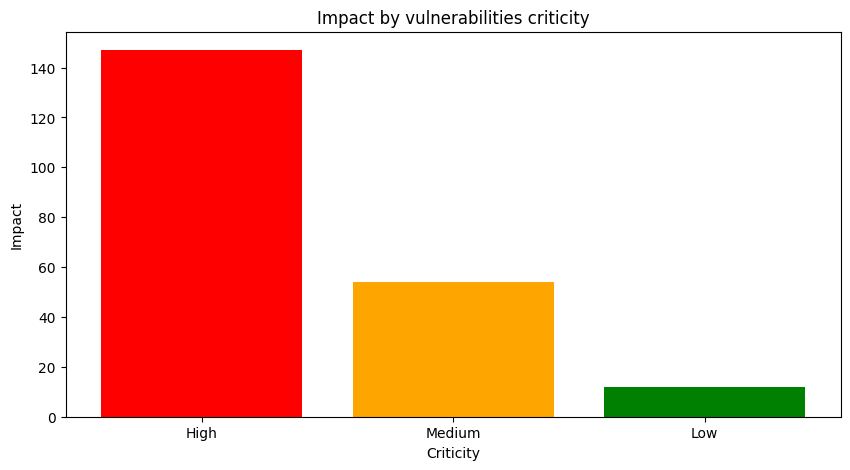

In [31]:
# Create a bar chart
# Data for the chart
categories = ['High', 'Medium', 'Low']
values = [HIGH, MEDIUM, LOW]

# Create bar chart
plt.figure(figsize=(10, 5))
plt.bar(categories, values, color=['red', 'orange', 'green'])

# Add title and labels to axes
plt.title('Impact by vulnerabilities criticity')
plt.xlabel('Criticity')
plt.ylabel('Impact')

# Show the chart
plt.show()

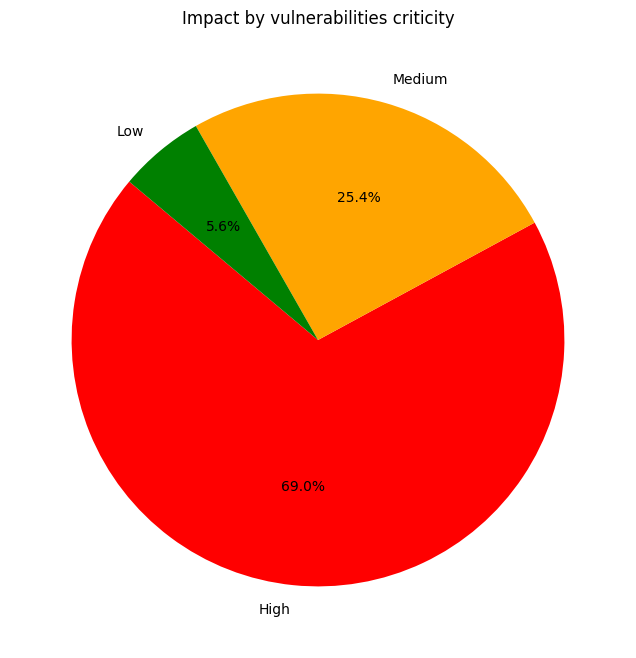

In [32]:
#Create a pie chart
# Data for the pie chart
categories = ['High', 'Medium', 'Low']
values = [HIGH, MEDIUM, LOW]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%', colors=['red', 'orange', 'green'], startangle=140)

# Add title
plt.title('Impact by vulnerabilities criticity')

# Show the pie chart
plt.show()
